# Charts

In [78]:
import pandas as pd
from matplotlib.ticker import  StrMethodFormatter
                               

In [79]:
df = pd.read_json("measurements.json", convert_dates=["timestamp"])
df["database"] = df["name"] + " " + df["version"]
df.rename(columns={"read_throughput": "read", "write_throughput": "write"}, inplace=True)

df2 = df[["database", "read", "write"]]
df2.set_index("database", inplace=True)
df2 = df2.transpose()
df2

database,aiosqlite 0.17.0,aiodbm 0.4.0
read,14347.481514,37648.137478
write,81.724287,30196.620141


<Axes: title={'center': 'Key/value throughput in operations / second with 50,000 items'}>

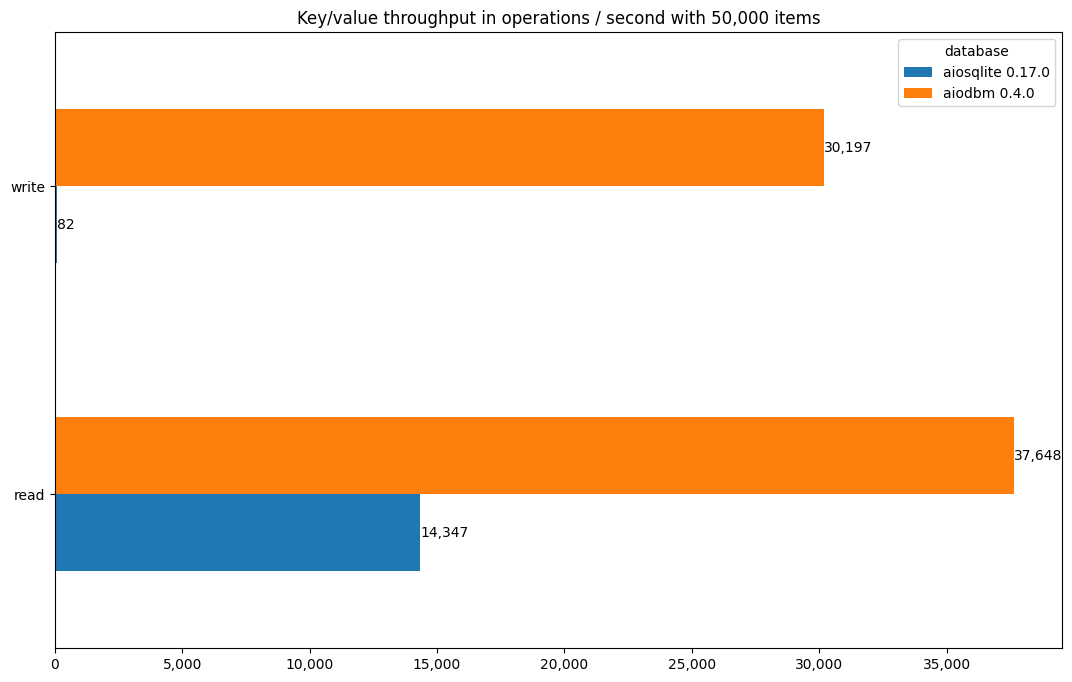

In [80]:
ax = df2.plot.barh(ylabel="", figsize=(13,8))
ax.xaxis.set_major_formatter("{x:,.0f}")
items_amount = df["items_amount"].max()
ax.set_title(f"Key/value throughput in operations / second with {items_amount:,} items")
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}")
ax.figure.savefig('measurements.png')
ax